# Diversity Measures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from itertools import chain, product


In [2]:
data_path = r'../../data/cps_clean_original_races.csv'
race_occ_path = r'../../data/race_codes.txt'

In [3]:
data_df = pd.read_csv(data_path, sep=';')

In [4]:
data_2023 = data_df[data_df['YEAR'] == 2023]

----
## Societal fractionalization index
The diversity is calculated for each year for each occupation. The lower the value the greater the homogenity.

In [5]:
def calc_frac_index(year: int, occ_col: str = 'OCC2010') -> pd.DataFrame:
    data = data_df[data_df['YEAR'] == year]

    div_dict = {}
    for o in data[occ_col].unique():
        # select only entries belonging to occupation o
        data_occ = data[data[occ_col] == o]
        N_ot = data_occ['ASECWT'].sum()

        occ_sum = 0.0

        for r in data_occ['RACE'].unique():
            # select only entries belonging to race r and sum their weights
            N_otr = data_occ[data_occ['RACE'] == r]['ASECWT'].sum()
            s_squared = (N_otr/N_ot)**2

            occ_sum += s_squared
        
        if occ_col == 'OCC2010':
            occ_title = data_occ['occ_title'].unique().item()
            div_dict[o] = [occ_title, (1-occ_sum)]
            div_df = pd.DataFrame.from_dict(div_dict, orient='index', columns=['occ_title', 'frac_index']).reset_index(names='OCC2010')
        else:
            div_dict[o] = (1-occ_sum)
            div_df = pd.DataFrame.from_dict(div_dict, orient='index', columns=['frac_index']).reset_index(names='occ_category')

    return div_df

### Calculate fractionalization index for 2023
#### For each occupation


The occupation 'Shoe and Leather Workers and Repairers' have a very low index/diversity. Taking a closer look, we can see that only White (and only 5) people work in this occupation. 

In [6]:
frac_2023 = calc_frac_index(2023)

In [7]:
frac_2023.sort_values(by='frac_index')

,OCC2010,occ_title,frac_index
224,8330.0,Shoe and Leather Workers and Repairers,0.000000
260,6820.0,"Earth Drillers, Except Oil and Gas",0.000000
394,3140.0,Audiologists,0.000000
384,8040.0,"Metal Furnace Operators, Tenders, Pourers, and...",0.000000
279,8540.0,"Woodworking Machine Setters, Operators, and Te...",0.000000
...,...,...,...
407,900.0,Financial Examiners,0.643668
419,7850.0,Food Cooking Machine Operators and Tenders,0.649131
382,1400.0,Computer Hardware Engineers,0.664537
338,5560.0,"Postal Service Mail Sorters, Processors, and P...",0.669881


In [8]:
data_2023[data_2023['OCC2010'] == 8330.0]['RACE'].unique()

array([100], dtype=int64)

In [9]:
data_2023[data_2023['OCC2010'] == 6820.0]['RACE'].unique()

array([100], dtype=int64)

In [10]:
data_2023[data_2023['OCC2010'] == 5560.0]['RACE'].unique()

array([100, 651, 200, 300], dtype=int64)

In [11]:
top_frac_index_df = pd.DataFrame()
low_frac_index_df = pd.DataFrame()

for year in list(range(2003, 2024)):
    frac_index = calc_frac_index(year)
    sorted_frac_index = frac_index.sort_values(by='frac_index')
    sorted_frac_index['YEAR'] = year

    top_frac_index_df = pd.concat([top_frac_index_df, sorted_frac_index.tail(10)], ignore_index=True)
    low_frac_index_df = pd.concat([low_frac_index_df, sorted_frac_index.head(10)], ignore_index=True)

In [12]:
top_frac_index_df

,OCC2010,occ_title,frac_index,YEAR
0,4500.0,Barbers,0.550701,2003
1,840.0,Financial Analysts,0.552608,2003
2,4200.0,First-Line Supervisors of Housekeeping and Jan...,0.571746,2003
3,5150.0,Procurement Clerks,0.576494,2003
4,4120.0,"Food Servers, Nonrestaurant",0.599569,2003
...,...,...,...,...
205,900.0,Financial Examiners,0.643668,2023
206,7850.0,Food Cooking Machine Operators and Tenders,0.649131,2023
207,1400.0,Computer Hardware Engineers,0.664537,2023
208,5560.0,"Postal Service Mail Sorters, Processors, and P...",0.669881,2023


#### For occupation categories

In [13]:
frac_cat_2023 = calc_frac_index(2023, 'Category')
sorted_frac_cat_2023 = frac_cat_2023.sort_values(by='frac_index')

In [14]:
sorted_frac_cat_2023

,occ_category,frac_index
16,"FARMING, FISHING, AND FORESTRY",0.163016
24,EXTRACTION,0.172994
15,"INSTALLATION, MAINTENANCE, AND REPAIR",0.251626
5,CONSTRUCTION,0.254777
0,"MANAGEMENT, BUSINESS, SCIENCE, AND ARTS",0.332099
17,TECHNICIANS,0.338218
19,LEGAL,0.341452
1,"EDUCATION, TRAINING, AND LIBRARY",0.345352
13,"ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA",0.347703
7,SALES AND RELATED,0.357096


In [15]:
data_2023[data_2023['Category'] == 'FARMING, FISHING, AND FORESTRY']['RACE'].unique()

array([100, 802, 810, 200, 812, 300, 651, 652], dtype=int64)

In [16]:
data_2023[data_2023['Category'] == 'COMPUTER AND MATHEMATICAL']['RACE'].unique()

array([100, 801, 300, 651, 200, 806, 652, 803, 802, 807, 815, 804, 812,
       805], dtype=int64)

C:\Users\jputz\AppData\Local\Temp\ipykernel_30716\3475533789.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_frac_cat_2023['occ_category'], rotation = 45, ha='right')


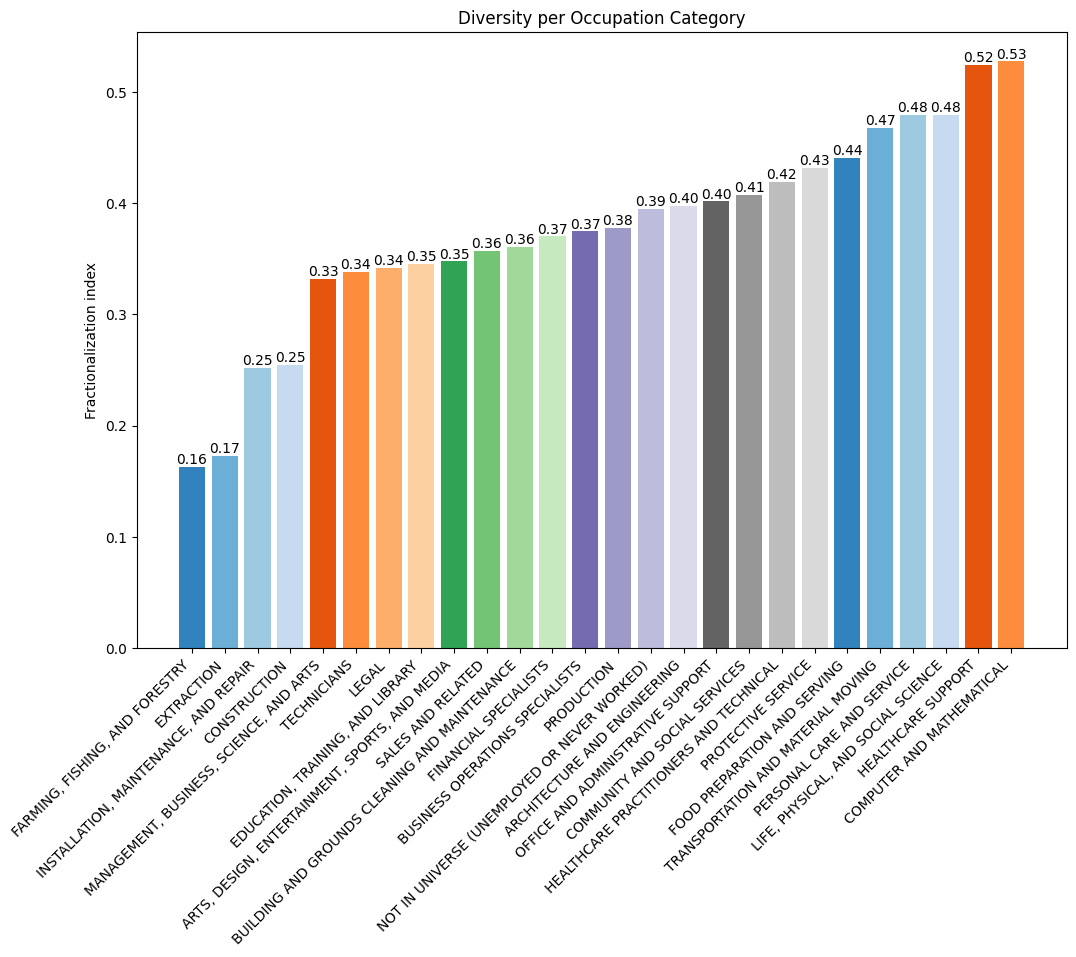

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_container = ax.bar(sorted_frac_cat_2023['occ_category'], sorted_frac_cat_2023['frac_index'], color=plt.cm.tab20c.colors
        )

ax.set_title('Diversity per Occupation Category', y = 1)
ax.set(ylabel='Fractionalization index')
ax.bar_label(bar_container, fmt='{:,.2f}')
ax.set_xticklabels(sorted_frac_cat_2023['occ_category'], rotation = 45, ha='right')
plt.show()

### over the years

In [19]:
top_frac_index_df = pd.DataFrame()
low_frac_index_df = pd.DataFrame()

for year in list(range(1968, 2024)):
    frac_index = calc_frac_index(year, 'Category')
    sorted_frac_index = frac_index.sort_values(by='frac_index')
    sorted_frac_index['YEAR'] = year

    top_frac_index_df = pd.concat([top_frac_index_df, sorted_frac_index], ignore_index=True)

In [20]:
top_frac_index_df

,occ_category,frac_index,YEAR
0,COMPUTER AND MATHEMATICAL,0.000000,1968
1,LEGAL,0.018256,1968
2,BUSINESS OPERATIONS SPECIALISTS,0.047978,1968
3,FINANCIAL SPECIALISTS,0.059964,1968
4,ARCHITECTURE AND ENGINEERING,0.060965,1968
...,...,...,...
1440,TRANSPORTATION AND MATERIAL MOVING,0.467956,2023
1441,PERSONAL CARE AND SERVICE,0.479407,2023
1442,"LIFE, PHYSICAL, AND SOCIAL SCIENCE",0.479566,2023
1443,HEALTHCARE SUPPORT,0.523969,2023


Text(0.5, 0.94, 'Diversity per occupation category over the years\n fractionalization index')

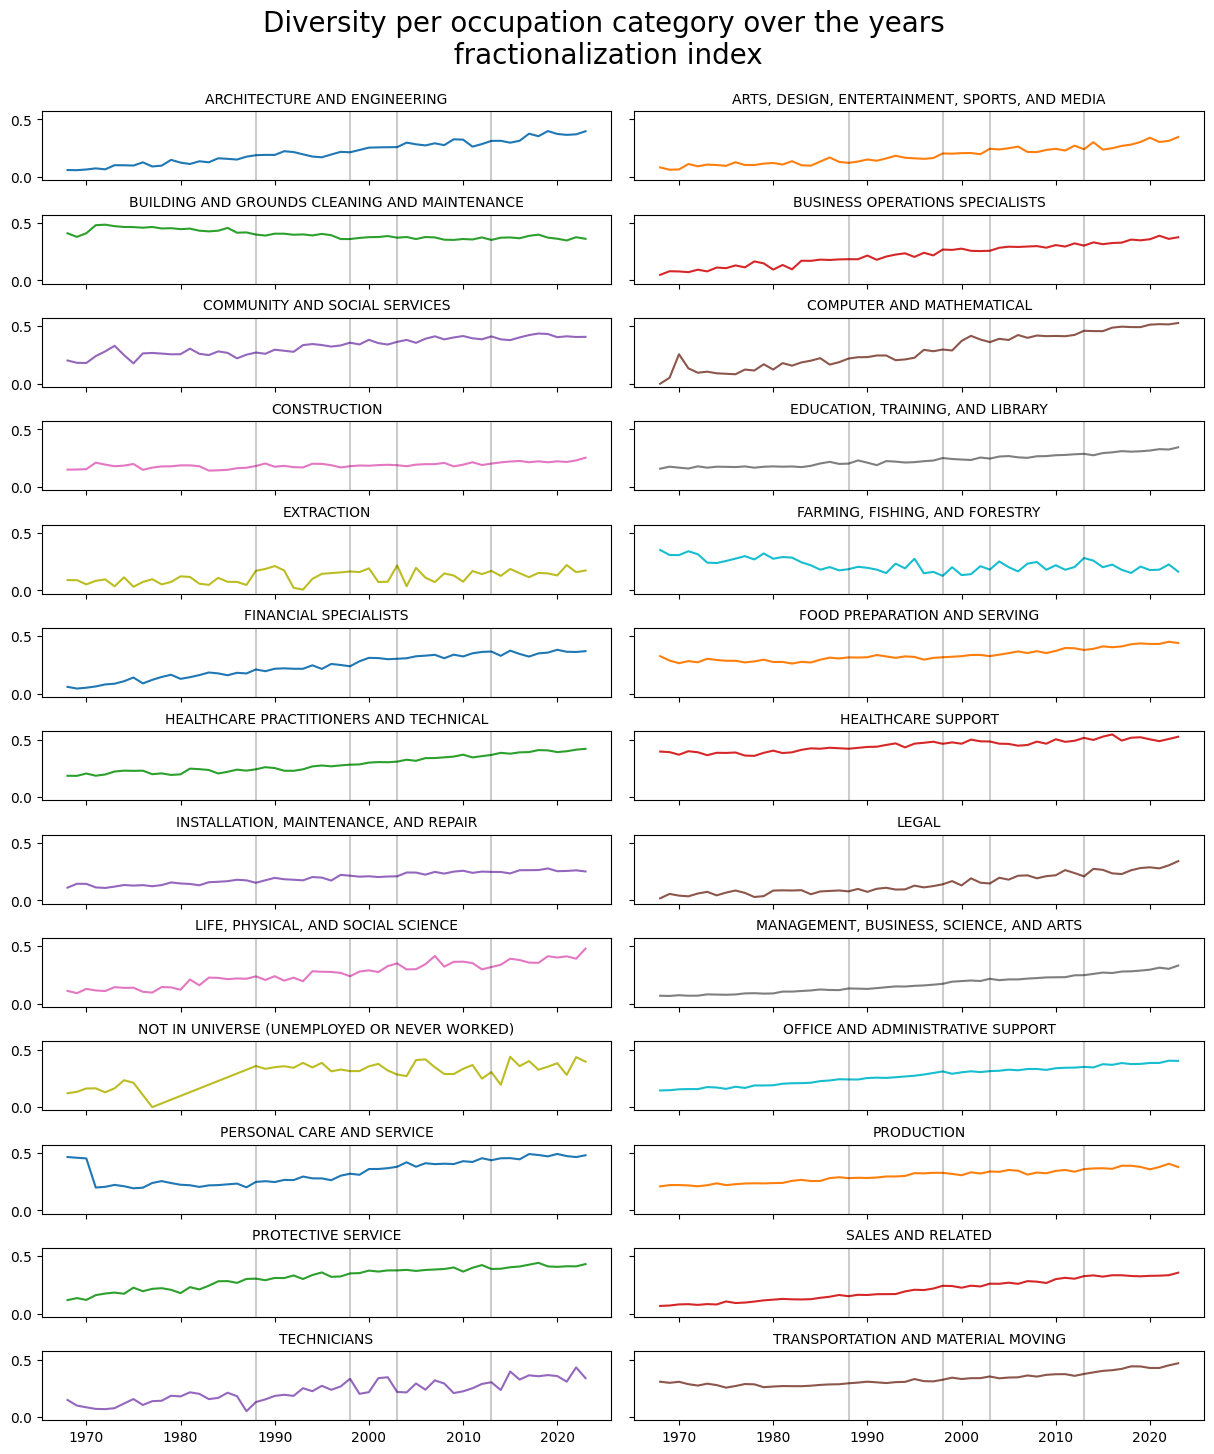

In [22]:
fig, axs = plt.subplots(13,2, figsize=(15, 17), sharex=True, sharey=True)
axs = list(chain(*axs))
fig.subplots_adjust(hspace= 0.5, wspace=0.04)
colors = plt.rcParams["axes.prop_cycle"]()

for (occupation_category, group_df), ax in zip(top_frac_index_df.groupby('occ_category'), axs):

    c = next(colors)["color"]
    ax.plot(group_df['YEAR'], group_df['frac_index'], color=c)
    ax.set_title(occupation_category, fontsize =10)

    ax.axvline(x=1988, color='black', alpha=0.2)
    ax.axvline(x=1998, color='black', alpha=0.2)
    ax.axvline(x=2003, color='black', alpha=0.2)
    ax.axvline(x=2013, color='black', alpha=0.2)


fig.suptitle('Diversity per occupation category over the years\n fractionalization index',ha='center', fontsize=20, y = 0.94)

----
## (Shannon-Weaver) Entropy Index